# Analysis

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler


sns.set(rc={'figure.figsize':(12,8)})

In [2]:
class CustomeOneHotEncoder:
    def __init__(self,drop=False):
        self.columns_ = None
        self.drop_ = drop
        self.encoder = OneHotEncoder()
        
    def fit(self,data,columns):
        self.columns_ = columns
        self.encoder.fit(data[self.columns_])
    
    def fit_transform(self,data,columns):
        self.fit(data,columns)
        return self.transform(data)
    
    def transform(self,data):
        feature_array = self.encoder.transform(data[self.columns_]).toarray()
        feature_label = self.encoder.categories_
        new_feature_label = []
        for x,y in zip(self.columns_,feature_label):
            new_feature_label.append([x+'_'+str(z) for z in y])

        final_feature_label= np.concatenate([x for x in new_feature_label])
        encoded_df = pd.DataFrame(feature_array,columns=final_feature_label,index = data.index)

        if self.drop_:
            cols_to_drop = [x[0] for x in new_feature_label]
            encoded_df = encoded_df.drop(cols_to_drop,axis=1)
        data = data.drop(self.columns_,axis=1)   
        #return encoded_df
        return pd.concat([data,encoded_df],axis=1)
    


# Linear Regression

In [3]:
pd.options.display.max_rows=None

In [4]:
data = pd.read_csv('train_1.csv')

data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Cabin_Codes,Title,Total_Members,Age_Group,Fare_Group,Age_Class,fare_per_person,Alone
0,1,0,3,0,1,0,0,0,0,1,2,0,66,3,0
1,2,1,1,1,1,0,1,1,2,1,5,3,38,35,0
2,3,1,3,1,0,0,0,0,1,0,3,0,78,7,1
3,4,1,1,1,1,0,0,1,2,1,5,3,35,26,0
4,5,0,3,0,0,0,0,0,0,0,5,1,105,8,1


In [5]:
data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   PassengerId      891 non-null    int64
 1   Survived         891 non-null    int64
 2   Pclass           891 non-null    int64
 3   Sex              891 non-null    int64
 4   SibSp            891 non-null    int64
 5   Parch            891 non-null    int64
 6   Embarked         891 non-null    int64
 7   Cabin_Codes      891 non-null    int64
 8   Title            891 non-null    int64
 9   Total_Members    891 non-null    int64
 10  Age_Group        891 non-null    int64
 11  Fare_Group       891 non-null    int64
 12  Age_Class        891 non-null    int64
 13  fare_per_person  891 non-null    int64
 14  Alone            891 non-null    int64
dtypes: int64(15)
memory usage: 104.5 KB


**For Getting equal no of classes**

In [157]:

"""
temp = data[(data['Survived'] == 0) ].iloc[:342,:]
temp2 = data[(data['Survived'] == 1) ]data.head()
data = pd.concat([temp,temp2]).sort_values(by='PassengerId')
data.head()
"""

"\ntemp = data[(data['Survived'] == 0) ].iloc[:342,:]\ntemp2 = data[(data['Survived'] == 1) ]data.head()\ndata = pd.concat([temp,temp2]).sort_values(by='PassengerId')\ndata.head()\n"

In [6]:

dataset = data.copy()


## Train And test Dataset

In [8]:
y = dataset['Survived']
print('All Columns : {}'.format(dataset.columns.values))
cols_to_drop = ['Survived','PassengerId']
#cols_to_drop = ['Survived','PassengerId','SibSp','Parch','Embarked','Age','Cabin_Codes','Fare', 'fare_per_person']
cols_to_inc = list(set(dataset.columns) - set(cols_to_drop))
print(' Dropped Columns : {}'.format(cols_to_drop))

x = dataset.drop(cols_to_drop,axis=1)

cat_columns = []
#cat_columns = ['Age_Group','Cabin_Codes','Sex','Pclass','Title','Embarked','Alone']
#cat_columns = ['Sex','Pclass','Title','Alone','Age_Group']
num_columns = list(set(x.columns)- set(cat_columns))
print('Cateogrical Columns : {} \n Numerical Columns : {}'.format(cat_columns,num_columns))
x.head()

All Columns : ['PassengerId' 'Survived' 'Pclass' 'Sex' 'SibSp' 'Parch' 'Embarked'
 'Cabin_Codes' 'Title' 'Total_Members' 'Age_Group' 'Fare_Group'
 'Age_Class' 'fare_per_person' 'Alone']
 Dropped Columns : ['Survived', 'PassengerId']
Cateogrical Columns : [] 
 Numerical Columns : ['Parch', 'Age_Group', 'Title', 'Total_Members', 'Alone', 'Sex', 'Cabin_Codes', 'Embarked', 'Fare_Group', 'Age_Class', 'fare_per_person', 'SibSp', 'Pclass']


,Pclass,Sex,SibSp,Parch,Embarked,Cabin_Codes,Title,Total_Members,Age_Group,Fare_Group,Age_Class,fare_per_person,Alone
0,3,0,1,0,0,0,0,1,2,0,66,3,0
1,1,1,1,0,1,1,2,1,5,3,38,35,0
2,3,1,0,0,0,0,1,0,3,0,78,7,1
3,1,1,1,0,0,1,2,1,5,3,35,26,0
4,3,0,0,0,0,0,0,0,5,1,105,8,1


In [9]:

'''encoder = CustomeOneHotEncoder(drop=True)

x = encoder.fit_transform(x,columns=cat_columns)
x.head()'''

'encoder = CustomeOneHotEncoder(drop=True)\n\nx = encoder.fit_transform(x,columns=cat_columns)\nx.head()'

In [10]:
scaler = StandardScaler()
x[num_columns] = scaler.fit_transform(x[num_columns])
x.head()

,Pclass,Sex,SibSp,Parch,Embarked,Cabin_Codes,Title,Total_Members,Age_Group,Fare_Group,Age_Class,fare_per_person,Alone
0,0.827377,-0.737695,0.432793,-0.473674,-0.571898,-0.447294,-0.709297,0.059160,-0.707687,-1.293570,0.037592,-0.459218,-1.231645
1,-1.566107,1.355574,0.432793,-0.473674,0.995982,0.103936,1.250342,0.059160,0.872637,1.376478,-0.799776,0.434090,-1.231645
2,0.827377,1.355574,-0.474545,-0.473674,-0.571898,-0.447294,0.270522,-0.560975,-0.180912,-1.293570,0.396465,-0.347554,0.811922
3,-1.566107,1.355574,0.432793,-0.473674,-0.571898,0.103936,1.250342,0.059160,0.872637,1.376478,-0.889494,0.182847,-1.231645
4,0.827377,-0.737695,-0.474545,-0.473674,-0.571898,-0.447294,-0.709297,-0.560975,0.872637,-0.403554,1.203927,-0.319638,0.811922


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,shuffle=True,random_state=1)

x_train.shape,x_test.shape


print('Test Shape : {} , Train Shape {}'.format(x_test.shape,x_train.shape))

Test Shape : (179, 13) , Train Shape (712, 13)


# Modelling

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics

In [16]:
model = sm.Logit(y_train,x_train).fit()

         Current function value: 0.444261
         Iterations: 35


C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      700
Method:                           MLE   Df Model:                           11
Date:                Tue, 08 Sep 2020   Pseudo R-squ.:                  0.3299
Time:                        23:30:33   Log-Likelihood:                -316.31
converged:                      False   LL-Null:                       -472.04
Covariance Type:            nonrobust   LLR p-value:                 3.366e-60
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Pclass             -0.2090      0.296     -0.706      0.480      -0.789       0.371
Sex                 1.1066      0.123      9.010      0.000       0.866       1.347
SibSp              -0.4409        nan        nan        nan         nan         nan
Parch              -0.0309        nan        nan        nan         nan         nan
Embarked            0.1137      0.104      1.096      0.273      -0.090       0.317
Cabin_Codes         0.2965      0.124      2.390      0.017       0.053       0.540
Title               0.4538      0.115      3.962      0.000       0.229       0.678
Total_Members      -0.3168        nan        nan        nan         nan         nan
Age_Group           0.0592      0.277      0.214      0.831      -0.484       0.602
Fare_Group         -0.0313      0.197     -0.159      0.874      -0.417       0.355
Age_Class          -0.6112      0.317     -1.927      0.054      -1.233       0.011
fare_per_person     0.1481      0.203      0.729      0.466      -0.250       0.546
Alone              -0.3170      0.168     -1.890      0.059      -0.646       0.012
===================================================================================
"""

**Sklearn Logisitc Regression**

In [18]:

model = LogisticRegression()
model = model.fit(x_train,y_train)
#print('Train Accuracy:', accuracy_score(y_train,res.predict(x_train)))
#print('Test Accuracy:', accuracy_score(y_test,res.predict(x_test)))

#print('Train Accuracy:' ,metrics.accuracy_score(y_train, res.predict(x_train)))
#print('Test Accuracy:' ,metrics.accuracy_score(y_test, res.predict(x_test)))


In [19]:
print('Train Accuracy:', accuracy_score(y_train,model.predict(x_train)))
print('Test Accuracy:', accuracy_score(y_test,model.predict(x_test)))

Train Accuracy: 0.8314606741573034
Test Accuracy: 0.7653631284916201


In [20]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,f1_score,roc_auc_score
print('Accuracy  : %.2f'%accuracy_score(y_test,model.predict(x_test)))
print('Precision : %.2f'%precision_score(y_test,model.predict(x_test)))
print('Recall : %.2f'%recall_score(y_test,model.predict(x_test)))
print('F1 Score : %.2f'%f1_score(y_test,model.predict(x_test)))

Accuracy  : 0.77
Precision : 0.74
Recall : 0.66
F1 Score : 0.70


[Text(0, 0.5, 'True Positive Rate'), Text(0.5, 0, 'False Positive Rate')]

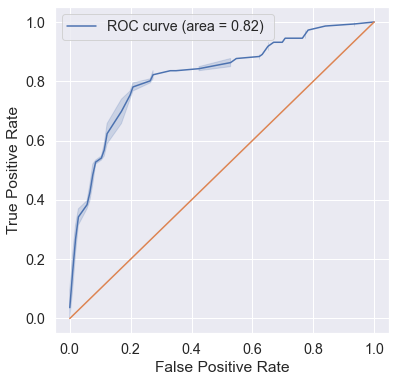

In [24]:
fpr,tpr,threshold = roc_curve(y_test,model.predict_proba(x_test)[:,1])

sns.set(rc={'figure.figsize':(6,6)},font_scale=1.3)
area = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
fig =sns.lineplot(fpr,tpr,label='ROC curve (area = {}) '.format(area.round(2)))
sns.lineplot([0,1],[0,1],markers='--')
fig.set(xlabel='False Positive Rate',ylabel='True Positive Rate')

**KFold Validation**

In [25]:
from sklearn.model_selection import KFold,cross_validate

In [26]:
cv = KFold(7,True,1)

C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [27]:
#model = LogisticRegression()

In [28]:
for train,test in cv.split(x):
    model.fit(x.iloc[train],y.iloc[train])
    print('Train acc :',model.score(x.iloc[train],y.iloc[train]))
    print('Test acc :',model.score(x.iloc[test],y.iloc[test]))

Train acc : 0.8230668414154653
Test acc : 0.7734375
Train acc : 0.8269986893840104
Test acc : 0.765625
Train acc : 0.8102094240837696
Test acc : 0.7716535433070866
Train acc : 0.81282722513089
Test acc : 0.8188976377952756
Train acc : 0.7997382198952879
Test acc : 0.9133858267716536
Train acc : 0.8115183246073299
Test acc : 0.7795275590551181
Train acc : 0.81282722513089
Test acc : 0.8188976377952756


### Cross Validation

In [29]:
cv_score = cross_validate(model,x,y,cv=7,scoring='accuracy')['test_score']

In [30]:
print("CV Score : Mean : %.7g | Std : %.7g | Min : %.7g | Max : %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

CV Score : Mean : 0.8024554 | Std : 0.01611816 | Min : 0.7795276 | Max : 0.8267717


In [31]:
print("CV Score : Mean : %.7g | Std : %.7g | Min : %.7g | Max : %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

CV Score : Mean : 0.8024554 | Std : 0.01611816 | Min : 0.7795276 | Max : 0.8267717


### Grid Search, Randomized Search

In [32]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [33]:
parameters = {'C':[0.001,0.01,0.1,0.5,1,5,10,100],
             'max_iter':[100,150,200,500,1000]
             }


In [34]:
cv_model = GridSearchCV(model,parameters,verbose=1,cv=7,scoring='accuracy')
cv_model.fit(x,y)


Fitting 7 folds for each of 40 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    4.3s finished


GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100],
                         'max_iter': [100, 150, 200, 500, 1000]},
             scoring='accuracy', verbose=1)

In [35]:
cv_model.best_params_,cv_model.best_score_

({'C': 0.1, 'max_iter': 100}, 0.8114366563554557)

[Text(0, 0.5, 'True Positive Rate'), Text(0.5, 0, 'False Positive Rate')]

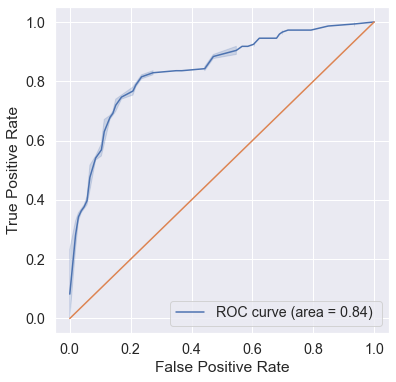

In [36]:
fpr,tpr,threshold = roc_curve(y_test,cv_model.predict_proba(x_test)[:,1])

sns.set(rc={'figure.figsize':(6,6)},font_scale=1.3)
area = roc_auc_score(y_test,cv_model.predict_proba(x_test)[:,1])
fig =sns.lineplot(fpr,tpr,label='ROC curve (area = {}) '.format(area.round(2)))
sns.lineplot([0,1],[0,1],markers='--')
fig.set(xlabel='False Positive Rate',ylabel='True Positive Rate')

### Randomized Search

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
from scipy.stats import uniform
C = uniform(0,1000)
parameters = {'C':C,
              'max_iter': [100, 150, 200, 500, 1000],
              'solver': ['lbfgs'] ,
              'penalty' : ['l1', 'l2']}


In [52]:
cv_model = RandomizedSearchCV(model,parameters,cv=7,scoring='accuracy',n_jobs=4)
cv_model.fit(x,y)


RandomizedSearchCV(cv=7, estimator=LogisticRegression(), n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FE7479D3C8>,
                                        'max_iter': [100, 150, 200, 500, 1000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['lbfgs']},
                   scoring='accuracy')

In [53]:
cv_model.best_params_,cv_model.best_score_

({'C': 160.42377354317506,
  'max_iter': 1000,
  'penalty': 'l2',
  'solver': 'lbfgs'},
 0.8035802165354331)

[Text(0, 0.5, 'True Positive Rate'), Text(0.5, 0, 'False Positive Rate')]

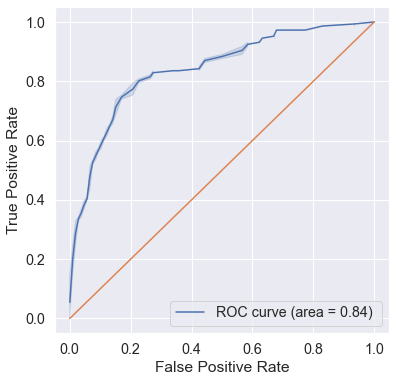

In [54]:
fpr,tpr,threshold = roc_curve(y_test,cv_model.predict_proba(x_test)[:,1])

sns.set(rc={'figure.figsize':(6,6)},font_scale=1.3)
area = roc_auc_score(y_test,cv_model.predict_proba(x_test)[:,1])
fig =sns.lineplot(fpr,tpr,label='ROC curve (area = {}) '.format(area.round(2)))
sns.lineplot([0,1],[0,1],markers='--')
fig.set(xlabel='False Positive Rate',ylabel='True Positive Rate')

## Create Submission

In [164]:
test_data = pd.read_csv('test_1.csv')
test_data = test_data.sample(frac=1)
passenger_id = test_data.PassengerId
test_data = test_data.drop(cols_to_drop[1:],axis=1)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Codes,Age_Group,Title,Total_Members,Multiply,fare_per_person
221,3,male,21.0,0,0,8.0500,S,No_Cabin,3,Mr,0,63.0,8.050000
152,3,male,60.5,0,0,7.8958,S,No_Cabin,5,Mr,0,181.5,7.895800
311,3,male,22.0,0,0,7.2250,C,No_Cabin,3,Mr,0,66.0,7.225000
350,1,female,45.0,0,1,63.3583,C,D,4,Mr,1,45.0,31.679150
356,1,female,59.0,2,0,51.4792,S,C,4,Mr,2,59.0,17.159733


In [165]:
test_data = encoder.transform(test_data)
test_data.head()

,Age,SibSp,Parch,Fare,Total_Members,Multiply,fare_per_person,Age_Group_2,Age_Group_3,Age_Group_4,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev,Embarked_Q,Embarked_S
221,21.0,0,0,8.0500,0,63.0,8.050000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
152,60.5,0,0,7.8958,0,181.5,7.895800,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
311,22.0,0,0,7.2250,0,66.0,7.225000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
350,45.0,0,1,63.3583,1,45.0,31.679150,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
356,59.0,2,0,51.4792,2,59.0,17.159733,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [166]:
test_data[num_columns] = scaler.fit_transform(test_data[num_columns])
#test_data = test_data.iloc[:,1:]
test_data.head()

,Age,SibSp,Parch,Fare,Total_Members,Multiply,fare_per_person,Age_Group_2,Age_Group_3,Age_Group_4,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev,Embarked_Q,Embarked_S
221,-0.637143,-0.499470,-0.400248,-0.493113,-0.553443,0.093927,-0.385842,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
152,2.408121,-0.499470,-0.400248,-0.495877,-0.553443,4.580756,-0.390178,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
311,-0.560047,-0.499470,-0.400248,-0.507901,-0.553443,0.207518,-0.409042,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
350,1.213144,-0.499470,0.619896,0.498251,0.105643,-0.587617,0.278628,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
356,2.292478,1.733455,-0.400248,0.285326,0.764728,-0.057527,-0.129669,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [64]:
'''#res = DecisionTreeClassifier(max_depth=4,criterion="entropy").fit(x,y)
dataset = dataset.sample(frac=1)


y = dataset['Survived']
cols_to_drop = ['Survived','PassengerId','Parch', 'Fare','Age_Group', 'SibSp','Multiply','Cabin_Codes']
x = dataset.drop(cols_to_drop,axis=1)
encoder = CustomeOneHotEncoder(drop=True)
x = encoder.fit_transform(x,columns=['Pclass','Sex','Embarked','Title'])
scaler = StandardScaler()
x[['Total_Members','Age']] = scaler.fit_transform(x[['Total_Members','Age']])
x.head()

#res = sm.OLS(y,sm.add_constant(x))
#res = res.fit()

res = LinearRegression(fit_intercept=False)
res = res.fit(x,y,)

#print('Train Accuracy:', accuracy_score(y_train,res.predict(x_train)))
#print('Test Accuracy:', accuracy_score(y_test,res.predict(x_test)))
print('Train Accuracy:' ,get_accuracy(x,y,res))
#pred_values = res.predict(test_data)
l = []
for x in res.predict(test_data).round(2):
    if x >0.5:
        l.append(1)
    else:
        l.append(0)

'''

Train Accuracy: 0.8201754385964912


In [167]:
result = pd.DataFrame({
                        'PassengerId': passenger_id,
                        'Survived': model.predict(test_data)
                        })
result = result.sort_values(by='PassengerId')

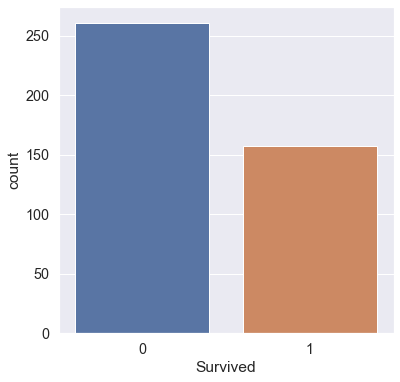

In [168]:
sns.countplot(result['Survived'])

In [169]:
result.shape

(418, 2)

In [170]:
result.to_csv('Prediction_22.csv',index=False)